In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
with open('data.npy', 'rb') as f:
    data = np.load(f)
    dataLabels = np.load(f)
testData = data[math.floor(len(data)*0.8):]
data = data[:math.floor(len(data)*0.8)]
testDataLabels = dataLabels[math.floor(len(dataLabels)*0.8):]
dataLabels = dataLabels[:math.floor(len(dataLabels)*0.8)]
dataset = tensorflow.data.Dataset.from_tensor_slices((data, dataLabels))
data

array([[-1.20541082,  1.13927856],
       [ 0.61022044, -0.5260521 ],
       [-1.15130261, -1.07915832],
       ...,
       [ 0.42985972, -0.33967936],
       [ 0.70641283,  0.5741483 ],
       [ 0.64028056,  1.03106212]])

In [3]:
model = Sequential()
model.add(Dense(12, input_shape=(2,), kernel_initializer='normal', activation='relu'))
model.add(Dense(16, activation='sigmoid', kernel_initializer='normal'))
model.add(Dense(4, activation='sigmoid', kernel_initializer='normal'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                36        
                                                                 
 dense_1 (Dense)             (None, 16)                208       
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy']) 
history = model.fit(data, dataLabels, epochs=30, batch_size=50, verbose=1)

Epoch 1/30
4000/4000 [==============================] - 4s 856us/step - loss: 0.3026 - binary_accuracy: 0.8474
Epoch 2/30
4000/4000 [==============================] - 4s 969us/step - loss: 0.1209 - binary_accuracy: 0.9482
Epoch 3/30
4000/4000 [==============================] - 4s 901us/step - loss: 0.0522 - binary_accuracy: 0.9840
Epoch 4/30
4000/4000 [==============================] - 4s 974us/step - loss: 0.0348 - binary_accuracy: 0.9890
Epoch 5/30
4000/4000 [==============================] - 3s 847us/step - loss: 0.0279 - binary_accuracy: 0.9912
Epoch 6/30
4000/4000 [==============================] - 4s 911us/step - loss: 0.0235 - binary_accuracy: 0.9927
Epoch 7/30
4000/4000 [==============================] - 3s 855us/step - loss: 0.0204 - binary_accuracy: 0.9938
Epoch 8/30
4000/4000 [==============================] - 4s 984us/step - loss: 0.0180 - binary_accuracy: 0.9946
Epoch 9/30
4000/4000 [==============================] - 4s 950us/step - loss: 0.0162 - binary_accuracy: 0.9951
E

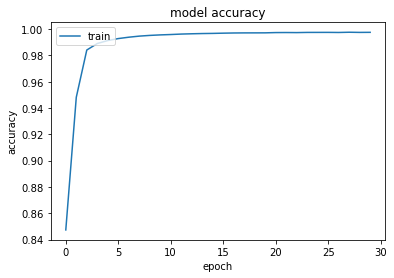

In [5]:
plt.plot(history.history['binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

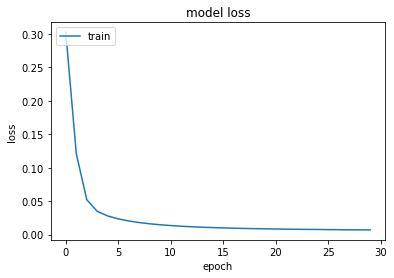

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
test_results = model.evaluate(testData, testDataLabels, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

1563/1563 [==============================] - 1s 816us/step - loss: 0.0070 - binary_accuracy: 0.9975
Test results - Loss: 0.006966711021959782 - Accuracy: 0.9974750280380249%


### Test results - Loss: 0.006966711021959782 - Accuracy: 0.9974750280380249%

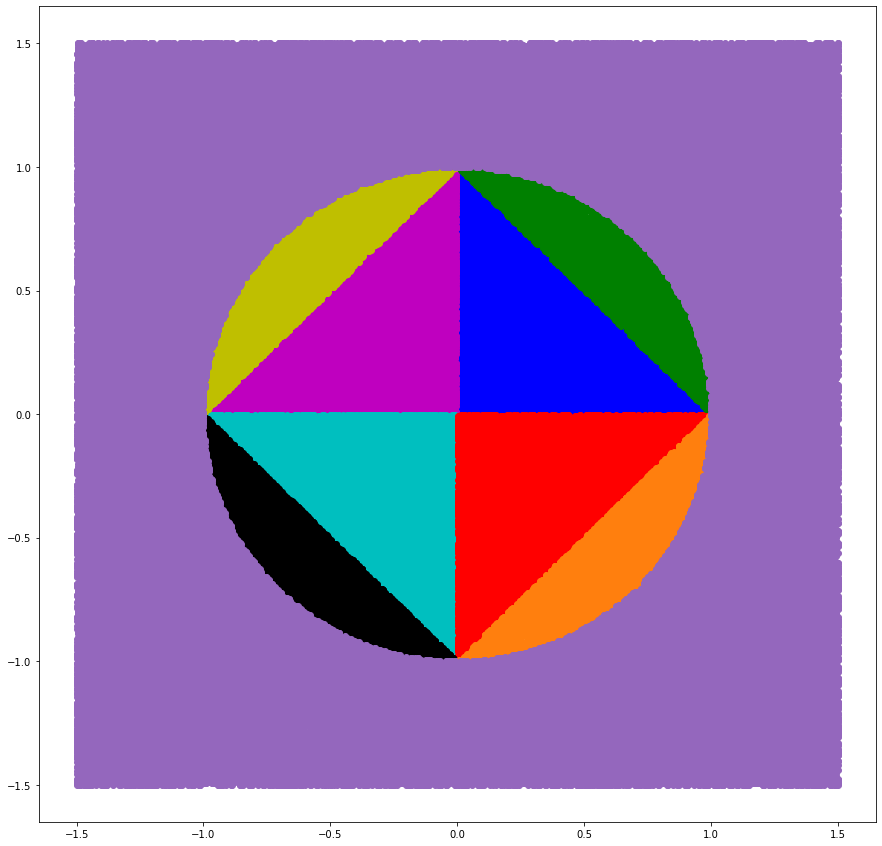

In [8]:
groupsTestx = [[],[],[],[],[],[],[],[],[]]
groupsTesty = [[],[],[],[],[],[],[],[],[]]
testData = data
testDataLabels = dataLabels
for i in range(len(testData)):
    if(testDataLabels[i][3]>=0.5):
        groupsTestx[8].append(testData[i][0])
        groupsTesty[8].append(testData[i][1])
    elif(testDataLabels[i][0]>=0.5):
        if testDataLabels[i][1] >= 0.5:
            if testDataLabels[i][2]>=0.5:
                #111
                groupsTestx[6].append(testData[i][0])
                groupsTesty[6].append(testData[i][1])
            else:
                #110
                groupsTestx[7].append(testData[i][0])
                groupsTesty[7].append(testData[i][1])
        else:
            if testDataLabels[i][2]>=0.5:
                #101
                groupsTestx[5].append(testData[i][0])
                groupsTesty[5].append(testData[i][1])
            else:
                #100
                groupsTestx[4].append(testData[i][0])
                groupsTesty[4].append(testData[i][1])
    else:
        if testDataLabels[i][1] >= 0.5:
            if testDataLabels[i][2]>=0.5:
                #011
                groupsTestx[2].append(testData[i][0])
                groupsTesty[2].append(testData[i][1])
            else:
                #010
                groupsTestx[3].append(testData[i][0])
                groupsTesty[3].append(testData[i][1])
        else:
            if testDataLabels[i][2]>=0.5:
                #001
                groupsTestx[1].append(testData[i][0])
                groupsTesty[1].append(testData[i][1])
            else:
                #000
                groupsTestx[0].append(testData[i][0])
                groupsTesty[0].append(testData[i][1])
                
plt.rcParams['figure.figsize'] = [15, 15]
plt.scatter(groupsTestx[0],groupsTesty[0], c='b')
plt.scatter(groupsTestx[1],groupsTesty[1], c='m')
plt.scatter(groupsTestx[2],groupsTesty[2], c='c')
plt.scatter(groupsTestx[3],groupsTesty[3], c='r')
plt.scatter(groupsTestx[4],groupsTesty[4], c='g')
plt.scatter(groupsTestx[5],groupsTesty[5], c='y')
plt.scatter(groupsTestx[6],groupsTesty[6], c='k')
plt.scatter(groupsTestx[7],groupsTesty[7], c='tab:orange')
plt.scatter(groupsTestx[8],groupsTesty[8], c='tab:purple')
plt.show()

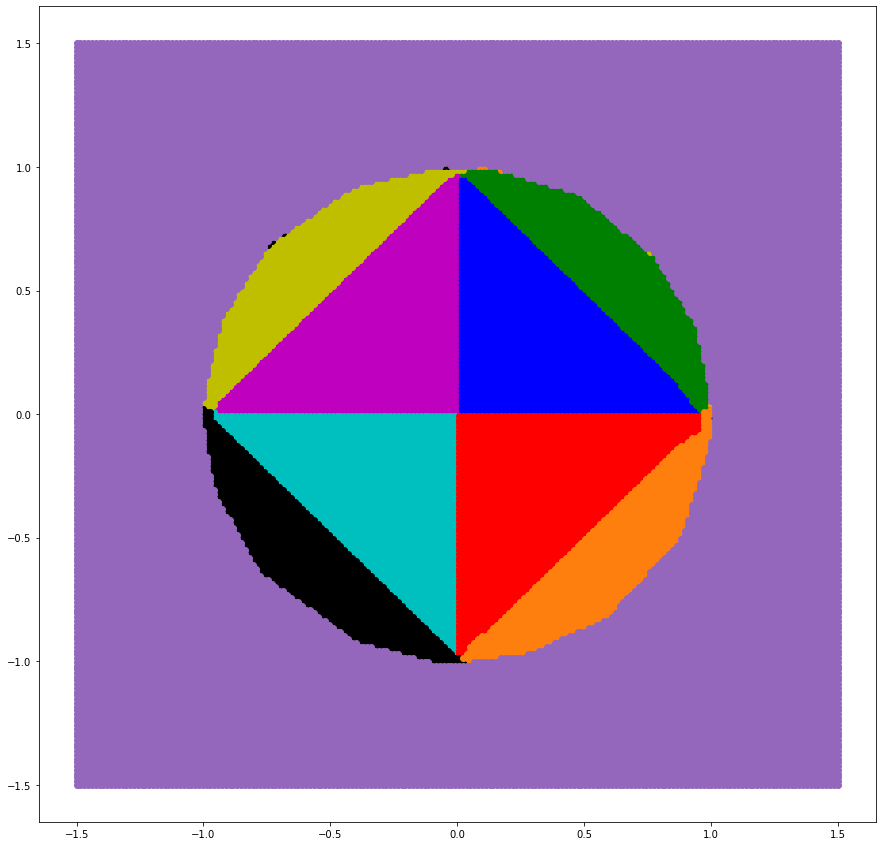

In [9]:
testx = np.linspace(-1.5,1.5,200)
testy = np.linspace(-1.5,1.5,200)
dataTest=[]
for i in range(200):
  for j in range(200):
      dataTest.append([testx[i], testy[j]])  
prediction = []

prediction=(model.predict(np.array(dataTest)))
groupsTestx = [[],[],[],[],[],[],[],[],[]]
groupsTesty = [[],[],[],[],[],[],[],[], []]
for i in range(len(dataTest)):
    if(prediction[i][3]>=0.5):
        groupsTestx[8].append(dataTest[i][0])
        groupsTesty[8].append(dataTest[i][1])
    elif(prediction[i][0]>=0.5):
        if prediction[i][1] >= 0.5:
            if prediction[i][2]>=0.5:
                #111
                groupsTestx[6].append(dataTest[i][0])
                groupsTesty[6].append(dataTest[i][1])
            else:
                #110
                groupsTestx[7].append(dataTest[i][0])
                groupsTesty[7].append(dataTest[i][1])
        else:
            if prediction[i][2]>=0.5:
                #101
                groupsTestx[5].append(dataTest[i][0])
                groupsTesty[5].append(dataTest[i][1])
            else:
                #100
                groupsTestx[4].append(dataTest[i][0])
                groupsTesty[4].append(dataTest[i][1])
    else:
        if prediction[i][1] >= 0.5:
            if prediction[i][2]>=0.5:
                #011
                groupsTestx[2].append(dataTest[i][0])
                groupsTesty[2].append(dataTest[i][1])
            else:
                #010
                groupsTestx[3].append(dataTest[i][0])
                groupsTesty[3].append(dataTest[i][1])
        else:
            if prediction[i][2]>=0.5:
                #001
                groupsTestx[1].append(dataTest[i][0])
                groupsTesty[1].append(dataTest[i][1])
            else:
                #000
                groupsTestx[0].append(dataTest[i][0])
                groupsTesty[0].append(dataTest[i][1])
                
plt.rcParams['figure.figsize'] = [15, 15]
plt.scatter(groupsTestx[0],groupsTesty[0], c='b')
plt.scatter(groupsTestx[1],groupsTesty[1], c='m')
plt.scatter(groupsTestx[2],groupsTesty[2], c='c')
plt.scatter(groupsTestx[3],groupsTesty[3], c='r')
plt.scatter(groupsTestx[4],groupsTesty[4], c='g')
plt.scatter(groupsTestx[5],groupsTesty[5], c='y')
plt.scatter(groupsTestx[6],groupsTesty[6], c='k')
plt.scatter(groupsTestx[7],groupsTesty[7], c='tab:orange')
plt.scatter(groupsTestx[8],groupsTesty[8], c='tab:purple')
plt.show()